# R0 Analysis of COVID-19
22 March 2020

Cecilia García López de Munain

## Libraries

In [36]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
from datetime import timedelta
import datetime

## Parameters

In [37]:
sys.path.append('./')

In [38]:
PATH_ROOT_INPUT_DATA = 'data\\input'
PATH_ROOT_INTERIM_DATA = 'data\\interim'
PATH_ROOT_OUTPUT_DATA = 'data\\output'

INTERIM_DATA_NAME_COVID = 'covid_19_data_cum.pkl'
INTERIM_DATA_NAME_GOVM = 'government_measures.csv'

## Import Data

COVID Data

In [39]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID), "rb" ))

In [40]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density
DateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,9942334.0,120.265320
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,5638676.0,7952.998418
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,209469333.0,25.061716
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,4137309.0,232.172222


In [41]:
covid19_data.columns

Index(['Day', 'Month', 'Year', 'NewConfCases', 'NewDeaths', 'CountryExp',
       'GeoId', 'NewConfCases_cum', 'NewDeaths_cum', 'Population',
       'Population Density'],
      dtype='object')

In [42]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

In [43]:
list(covid19_data['CountryExp'].sort_values().unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia_and_Herzegovina',
 'Brazil',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'CANADA',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech_Republic',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe_Islands',
 'Fiji',
 'Finland',
 'France',
 'French_Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greec

Government Measures Data

In [44]:
gov_measures = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA, INTERIM_DATA_NAME_GOVM))

In [45]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


## Compute moving averages

In [46]:
def compute_growth_3days(df):
    '''This function computes the proportion in which the total confirmed cases increase each 3 days'''
    
    df.loc[:,'Growth3Days'] = np.nan
    df.sort_values(['CountryExp','DateRep'], inplace=True)
    df.loc[:,'Growth3Days'] = df.loc[:,'NewConfCases_cum'] / df.shift(3).loc[:,'NewConfCases_cum'].where(
        cond=(df.loc[:,'CountryExp'] == df.shift(3).loc[:,'CountryExp']) & (df.shift(3).loc[:,'NewConfCases_cum'] > 0)
    )
    df.sort_index(inplace=True)
    return df

In [47]:
compute_growth_3days(covid19_data)

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days
DateRep,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Afghanistan,AF,0,0,3.717239e+07,56.937760,NaN
2019-12-31,31,12,2019,0,0,Greece,EL,0,0,1.072767e+07,83.224732,NaN
2019-12-31,31,12,2019,0,0,Germany,DE,0,0,8.292792e+07,237.370970,NaN
2019-12-31,31,12,2019,0,0,Georgia,GE,0,0,3.731000e+06,65.275202,NaN
2019-12-31,31,12,2019,0,0,France,FR,0,0,6.698724e+07,122.338396,NaN
2019-12-31,31,12,2019,0,0,Taiwan,TW,0,0,NaN,NaN,NaN
2019-12-31,31,12,2019,0,0,Finland,FI,0,0,5.518050e+06,18.156856,NaN
2019-12-31,31,12,2019,0,0,Estonia,EE,0,0,1.320884e+06,30.386105,NaN
2019-12-31,31,12,2019,0,0,Egypt,EG,0,0,NaN,NaN,NaN


In [48]:
# Sort value for moving averages
covid19_data = covid19_data.reset_index().sort_values(['CountryExp','DateRep'], ascending=True)

In [49]:
# Compute previous growth average
def calc_pre_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'previous_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'previous_growth_3d'] = data.loc[:,'Growth3Days'].expanding(1).mean()

In [50]:
calc_pre_rolling_mean(covid19_data)

In [51]:
# Compute previous growth average
def calc_fwd_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'forward_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = data.sort_values(['CountryExp','DateRep'], ascending=False)['Growth3Days'].expanding(1).mean()
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = np.where(df.loc[df.loc[:,'CountryExp']==country,'Growth3Days'].notnull(), df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'], np.nan)
        

In [52]:
calc_fwd_rolling_mean(covid19_data)

In [53]:
covid19_data.set_index('DateRep', inplace=True)

In [54]:
covid19_data.loc[covid19_data.loc[:,'CountryExp']=='Argentina',:]

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,,
2020-03-04,4,3,2020,1,0,Argentina,AR,1,0,44494502.0,16.25851,NaN,NaN,NaN
2020-03-06,6,3,2020,1,0,Argentina,AR,2,0,44494502.0,16.25851,NaN,NaN,NaN
2020-03-07,7,3,2020,6,0,Argentina,AR,8,0,44494502.0,16.25851,NaN,NaN,NaN
2020-03-08,8,3,2020,1,1,Argentina,AR,9,1,44494502.0,16.25851,9.000000,9.000000,3.039687
2020-03-09,9,3,2020,3,0,Argentina,AR,12,1,44494502.0,16.25851,6.000000,7.500000,2.542994
2020-03-11,11,3,2020,7,0,Argentina,AR,19,1,44494502.0,16.25851,2.375000,5.791667,2.228721
2020-03-13,13,3,2020,12,0,Argentina,AR,31,1,44494502.0,16.25851,3.444444,5.204861,2.214093
2020-03-14,14,3,2020,3,1,Argentina,AR,34,2,44494502.0,16.25851,2.833333,4.730556,2.077388
2020-03-15,15,3,2020,11,0,Argentina,AR,45,2,44494502.0,16.25851,2.368421,4.336866,1.982894


## Join datasets

In [55]:
# Filter countries in Government Measures
covid19_data_filtered = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(list(gov_measures.loc[:,'CountryExp'].unique()))]

# Get First date for each country
covid19_data_filtered = covid19_data_filtered.loc[covid19_data_filtered.loc[:,'NewConfCases']>0,'CountryExp'].reset_index().groupby('CountryExp').min()

In [56]:
covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')

In [57]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days,previous_growth_3d,forward_growth_3d
DateRep,,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN
2020-01-01,1,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN
2020-01-02,2,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN
2020-01-03,3,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN
2020-01-04,4,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN


In [58]:
# covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')
# covid19_data_filtered.loc[:,'DateRep'] 

covid19_data_filtered.loc[:,'DayOfGovM'] = covid19_data_filtered.loc[:,'DateRep'] + pd.to_timedelta(covid19_data_filtered.loc[:,'DaysFromFirst'], unit='D')

In [59]:
covid19_data_filtered.head(40)

,CountryExp,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,2019-12-31,Recomendación de aislamiento,23,2020-01-23
1,China,2019-12-31,Limitaciones drásticas al transporte,24,2020-01-24
2,China,2019-12-31,Cierre de espectáculos,24,2020-01-24
3,China,2019-12-31,Cierre de escuelas,27,2020-01-27
4,China,2019-12-31,Bloqueo de ciudades afectadas,34,2020-02-03
5,China,2019-12-31,Apertura de clases en algunas provincias,72,2020-03-12
6,France,2020-01-25,Cierre de espectáculos,43,2020-03-08
7,France,2020-01-25,Recomendación de aislamiento,51,2020-03-16
8,France,2020-01-25,Licencias y home office,51,2020-03-16
9,France,2020-01-25,Cierre de escuelas,51,2020-03-16


In [60]:
covid19_data_withgovm = pd.merge(covid19_data.reset_index(), covid19_data_filtered.loc[:,['CountryExp','Government Measure','DayOfGovM','DaysFromFirst']], left_on=['CountryExp','DateRep'], right_on=['CountryExp','DayOfGovM'], how='left').set_index('DateRep')

In [61]:
covid19_data_withgovm.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-01,1,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-02,2,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-03,3,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-04,4,1,2020,0,0,Afghanistan,AF,0,0,37172386.0,56.93776,NaN,NaN,NaN,NaN,NaT,NaN


In [62]:
covid19_data_withgovm = covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp'].isin(covid19_data_filtered.loc[:,'CountryExp']),:]

In [63]:
list_of_measures = gov_measures.loc[:,'Government Measure'].unique()
list_of_countries =  covid19_data_withgovm.loc[:,'CountryExp'].unique()
print(list_of_measures)
print(list_of_countries)

['Alerta Epidemiológica' 'Supervisión de ingreso de pasajeros'
 'Cierre de escuelas' 'Licencias y home office' 'Cierre de espectáculos'
 'Restricciones al transporte público'
 'Limitaciones drásticas al transporte' 'Recomendación de aislamiento'
 'Bloqueo de ciudades afectadas' 'Cierre de fronteras'
 'Apertura de clases en algunas provincias']
['China' 'France' 'Italy' 'Spain']


## Plot timelines

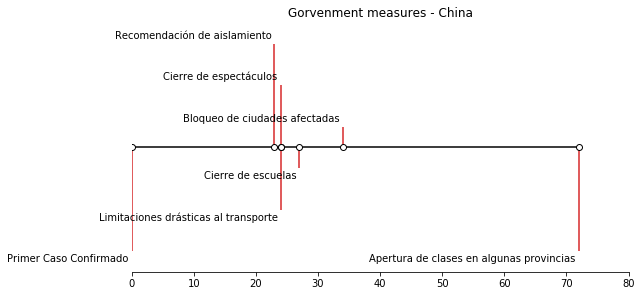

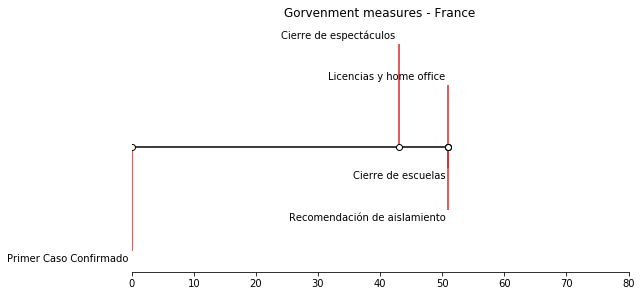

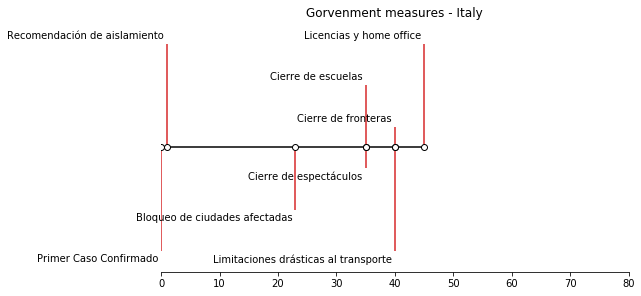

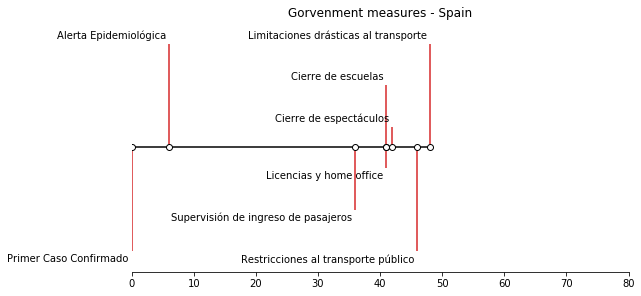

In [64]:
for country in list_of_countries:
    # Process data
    data_country = covid19_data_filtered.loc[covid19_data_filtered.loc[:,'CountryExp'] == country,['DateRep','Government Measure','DayOfGovM', 'DaysFromFirst']].sort_values('DayOfGovM')
    data_to_plot = data_country.loc[:,['Government Measure','DaysFromFirst']].rename(columns={'Government Measure': 'event', 'DaysFromFirst': 'day'})
    data_min_date = pd.DataFrame({'event': ['Primer Caso Confirmado'], 'day': [0]})
    data_to_plot = data_to_plot.append(data_min_date).sort_values('day')
    
    # Create x and y 
    dates = data_to_plot.loc[:, 'day']
    names = data_to_plot.loc[:, 'event']
    
    # Choose some nice levels
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="Gorvenment measures - {}".format(country))

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)
    
    ax.margins(y=0.1)
    ax.set_xlim(0,80)
    
    fig.savefig(os.path.join(PATH_ROOT_OUTPUT_DATA, 'timeseries_{}.png'.format(country)))

## Analyse mesures

In [65]:
gov_measures.head(30)

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [66]:
[(x,y) for x in ['Cierre de escuelas', 'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'France'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'France'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain')]

In [67]:
measures_countries =  [(x,y) for x in ['Cierre de escuelas',  'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

### Some Plotting

c:\users\c.lopez.de.munain\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Cierre de escuelas en  China  : 2020-01-27T00:00:00.000000000 con  2775 casos confirmados.
Cierre de escuelas en  France  : 2020-03-16T00:00:00.000000000 con  5423 casos confirmados.
Cierre de escuelas en  Italy  : 2020-03-06T00:00:00.000000000 con  3858 casos confirmados.
Cierre de escuelas en  Spain  : 2020-03-13T00:00:00.000000000 con  3004 casos confirmados.
Cierre de espectáculos en  China  : 2020-01-24T00:00:00.000000000 con  882 casos confirmados.
Cierre de espectáculos en  France  : 2020-03-08T00:00:00.000000000 con  716 casos confirmados.
Cierre de espectáculos en  Italy  : 2020-03-06T00:00:00.000000000 con  3858 casos confirmados.
Cierre de espectáculos en  Spain  : 2020-03-14T00:00:00.000000000 con  4231 casos confirmados.
Limitaciones drásticas al transporte en  China  : 2020-01-24T00:00:00.000000000 con  882 casos confirmados.
Limitaciones drásticas al transporte en  Italy  : 2020-03-11T00:00:00.000000000 con  10149 casos confirmados.
Limitaciones drásticas al transporte e

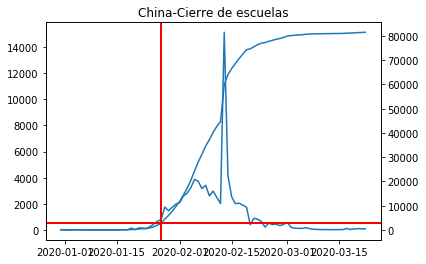

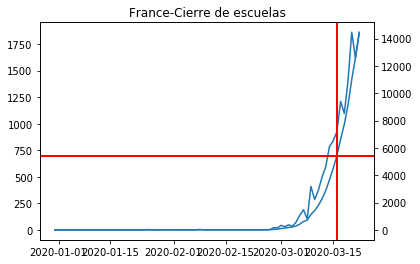

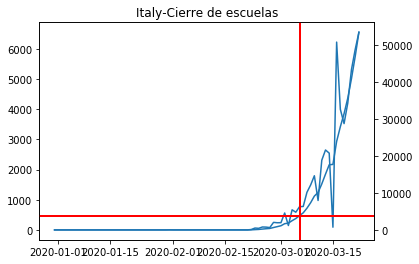

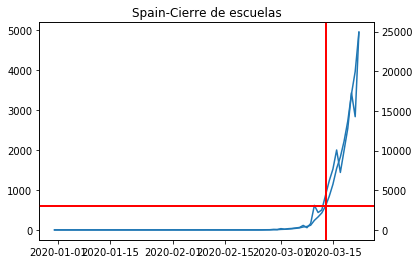

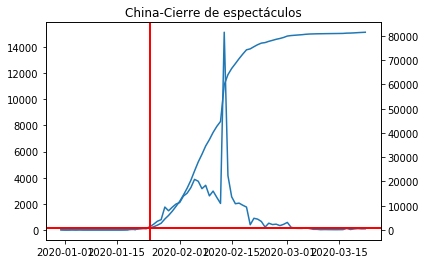

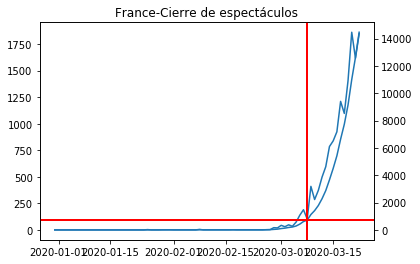

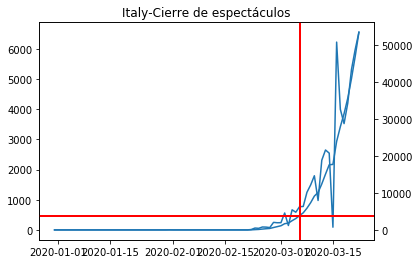

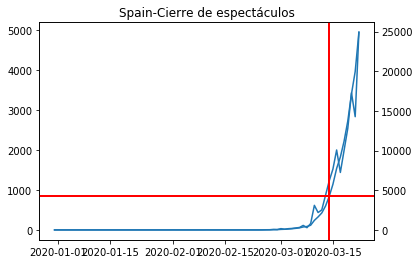

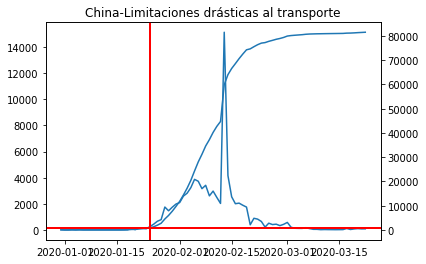

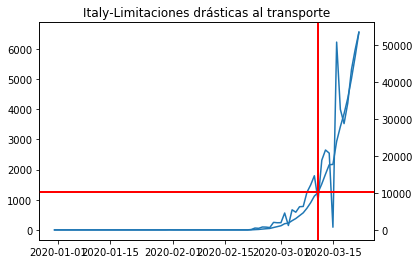

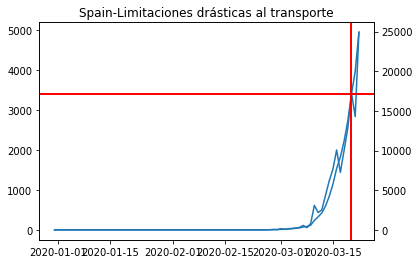

In [68]:
for measure, country in measures_countries:
    
    event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure) & (covid19_data_withgovm.loc[:,'CountryExp']==country),'NewConfCases_cum']
    if len(event)>0:

        fig, ax1 = plt.subplots()

        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases'])

        ax2 = ax1.twinx()

        ax2.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases_cum'])

        print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'casos confirmados.')

        plt.axvline(x=event.index, linewidth=2, color='r') 
        plt.axhline(y=event.values, linewidth=2, color='r') 

        plt.title(country + '-' + measure)

## Determine the effect on the exponential

In [69]:
covid19_data_withgovm.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,27,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-01,1,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-02,2,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-03,3,1,2020,17,0,China,CN,44,0,1.392730e+09,148.348833,1.62963,1.62963,1.490825,NaN,NaT,NaN
2020-01-04,4,1,2020,0,0,China,CN,44,0,1.392730e+09,148.348833,1.62963,1.62963,1.489068,NaN,NaT,NaN


### Compute effects of gov measures

In [70]:
covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']=='China',:]

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,27,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-01,1,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-02,2,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-03,3,1,2020,17,0,China,CN,44,0,1.392730e+09,148.348833,1.629630,1.629630,1.490825,NaN,NaT,NaN
2020-01-04,4,1,2020,0,0,China,CN,44,0,1.392730e+09,148.348833,1.629630,1.629630,1.489068,NaN,NaT,NaN
2020-01-05,5,1,2020,15,0,China,CN,59,0,1.392730e+09,148.348833,2.185185,1.814815,1.487266,NaN,NaT,NaN
2020-01-06,6,1,2020,0,0,China,CN,59,0,1.392730e+09,148.348833,1.340909,1.696338,1.478202,NaN,NaT,NaN
2020-01-07,7,1,2020,0,0,China,CN,59,0,1.392730e+09,148.348833,1.340909,1.625253,1.480009,NaN,NaT,NaN
2020-01-08,8,1,2020,0,0,China,CN,59,0,1.392730e+09,148.348833,1.000000,1.521044,1.481863,NaN,NaT,NaN


In [71]:
# Consolidate effects of government measures on growth
measures_effect = covid19_data_withgovm.loc[~covid19_data_withgovm.loc[:,'Government Measure'].isna(),['CountryExp','Government Measure','DaysFromFirst','Growth3Days','previous_growth_3d','forward_growth_3d']]
measures_effect.rename(columns={'Growth3Days':'actual_value_growth'}, inplace=True)

In [72]:
# Compute impact
measures_effect.loc[:,'growth_effect'] = measures_effect.loc[:,'forward_growth_3d'] / measures_effect.loc[:,'previous_growth_3d']

In [73]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst,actual_value_growth,previous_growth_3d,forward_growth_3d,growth_effect
DateRep,,,,,,,
2020-01-23,China,Recomendación de aislamiento,23.0,2.651064,1.754877,1.417744,0.807888
2020-01-24,China,Limitaciones drásticas al transporte,24.0,2.284974,1.778972,1.396841,0.785195
2020-01-24,China,Cierre de espectáculos,24.0,2.284974,1.778972,1.396841,0.785195
2020-01-27,China,Cierre de escuelas,27.0,3.146259,1.919595,1.328972,0.692319
2020-02-03,China,Bloqueo de ciudades afectadas,34.0,1.771773,2.030110,1.144373,0.563700
2020-03-12,China,Apertura de clases en algunas provincias,72.0,1.000903,1.560673,1.001801,0.641903
2020-03-08,France,Cierre de espectáculos,43.0,2.512281,1.678363,2.001894,1.192766
2020-03-16,France,Recomendación de aislamiento,51.0,1.885605,1.760052,1.710292,0.971728
2020-03-16,France,Licencias y home office,51.0,1.885605,1.760052,1.710292,0.971728


In [74]:
# European countries
european_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['France','Italy','Spain']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
european_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Alerta Epidemiológica,6.000000,1.000000,2.302190
Bloqueo de ciudades afectadas,23.000000,26.333333,1.943953
Cierre de escuelas,42.333333,2.161025,0.785290
Cierre de espectáculos,40.000000,2.398728,0.852397
Cierre de fronteras,40.000000,1.725140,0.419975
Licencias y home office,45.666667,1.989112,0.793215
Limitaciones drásticas al transporte,44.000000,1.795385,0.617191
Recomendación de aislamiento,26.000000,1.885605,0.971728
Restricciones al transporte público,46.000000,1.942986,0.813270


In [75]:
# China
china_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['China']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
china_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Apertura de clases en algunas provincias,72.0,1.000903,0.641903
Bloqueo de ciudades afectadas,34.0,1.771773,0.563700
Cierre de escuelas,27.0,3.146259,0.692319
Cierre de espectáculos,24.0,2.284974,0.785195
Limitaciones drásticas al transporte,24.0,2.284974,0.785195
Recomendación de aislamiento,23.0,2.651064,0.807888


In [76]:
df_effects = european_effects.merge(china_effects,left_index=True,right_index=True,how='outer',suffixes=('_eu', '_ch'))

df_effects.loc[:,'effect_diff'] = (df_effects.loc[:,'growth_effect_eu'] - df_effects.loc[:,'growth_effect_ch']) / df_effects.loc[:,'growth_effect_eu']

In [77]:
df_effects.to_csv('C:\\Users\\c.lopez.de.munain\\Documents\\covid_19\\data\\govmeasures_effect.csv')

In [80]:
df_effects_final = df_effects.round(2).dropna()
df_effects_final

,DaysFromFirst_eu,actual_value_growth_eu,growth_effect_eu,DaysFromFirst_ch,actual_value_growth_ch,growth_effect_ch,effect_diff
Government Measure,,,,,,,
Bloqueo de ciudades afectadas,23.00,26.33,1.94,34.0,1.77,0.56,0.71
Cierre de escuelas,42.33,2.16,0.79,27.0,3.15,0.69,0.12
Cierre de espectáculos,40.00,2.40,0.85,24.0,2.28,0.79,0.08
Limitaciones drásticas al transporte,44.00,1.80,0.62,24.0,2.28,0.79,-0.27
Recomendación de aislamiento,26.00,1.89,0.97,23.0,2.65,0.81,0.17


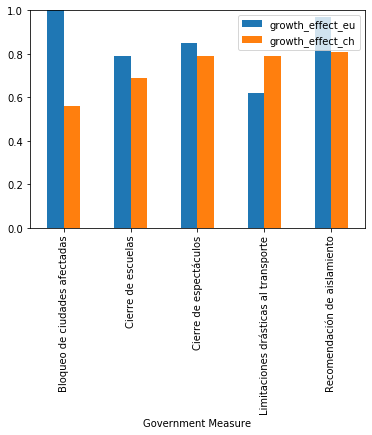

In [90]:
ax = df_effects_final.loc[:,['growth_effect_eu','growth_effect_ch']].plot(kind='bar')
ax.set_ylim(0,1)

ax.figure.savefig(os.path.join(PATH_ROOT_OUTPUT_DATA, 'gov_measures_effect.png'))